# COMP90086 Workshop 3

In this workshop, you will have some practice of spatial filtering and frequency filtering on images.

Table of Contents

- Spatial Filtering
    - Standard filtering: blur, sharpen and edges
    - Cross-correlation vs. Convolution
    - Derivative of Gaussian
    - Handle border effect
   
- Frequency Filtering
    - Fourier transformation
    - Swap magnitude/phase
    - Fourier transform a filter 
    - Gaussian lowpass filter in the frequency domain
    


# Spatial Filtering

## (1) Standard filtering: blur, sharpen and edge detection

In [1]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt

import warnings
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)

### Blur

In [2]:
#read in an image from a filepath as graycsale.
rootpath='./'
img= cv2.imread(os.path.join(rootpath, "img1.png"),cv2.IMREAD_GRAYSCALE) 

The cv2.filter2D( ) operation convolve a kernel with an image.

[filter2D(src, ddepth, kernel)](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)

The filter2D(  )function requires three input arguments:

- The first argument is the source image.

- The second argument is ddepth, which indicates the depth of the resulting image. A value of -1 indicates that the final image will also have the same depth as the source image.

- The final input argument is the kernel, which we apply to the source image.

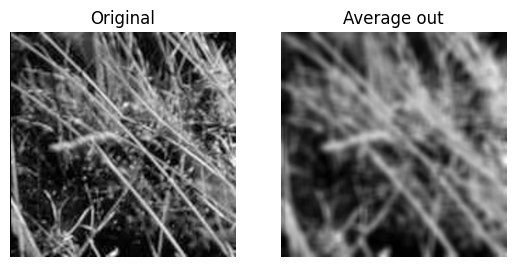

In [3]:
# average filter
avg_kernel = np.ones((15,15),np.float32)/225
avg_out = cv2.filter2D(img,-1,avg_kernel)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray') 
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(avg_out,cmap='gray') 
plt.title('Average out')
plt.axis('off')
plt.show()

Gaussian filter

[cv2.getGaussianKernel(ksize, sigma)](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa)
- ksize - kernel size, should be odd and positive (3,5,...)
- sigma - Gaussian standard deviation. 

[np.outer(a, b, out=None)](https://numpy.org/doc/stable/reference/generated/numpy.outer.html)
- Compute the outer product of two vectors.

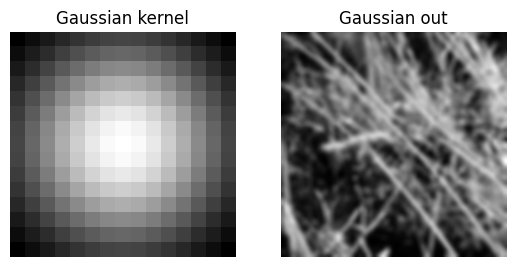

In [4]:
# Gaussian filter size 15

# 1d gaussian kernel (size, sigma)
gau_kernel = cv2.getGaussianKernel(15,5)

gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d=gau_kern2d/gau_kern2d.sum()
gau_out = cv2.filter2D(img,-1,gau_kern2d)
    
plt.subplot(1,2,1)
plt.imshow(gau_kern2d,cmap='gray' )
plt.title('Gaussian kernel')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gau_out,cmap='gray') 
plt.title('Gaussian out')
plt.axis('off')
plt.show()

### Sharpen

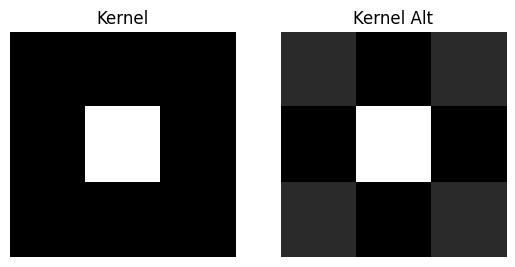

In [5]:
shap_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])  
shap_kernel_alt = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])  

plt.subplot(1,2,1)
plt.imshow(shap_kernel, cmap='gray') 
plt.title('Kernel')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(shap_kernel_alt, cmap='gray') 
plt.title('Kernel Alt')
plt.axis('off')

plt.show()

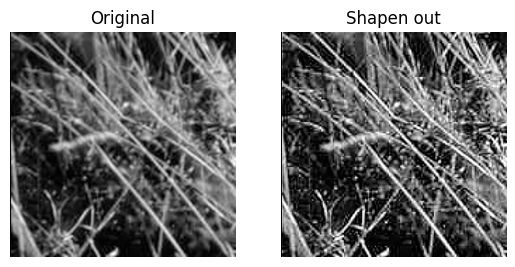

In [6]:
shapen_out= cv2.filter2D(img, -1, shap_kernel)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray') 
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(shapen_out,cmap='gray') 
plt.title('Shapen out')
plt.axis('off')
 
plt.show()

### Edge detection

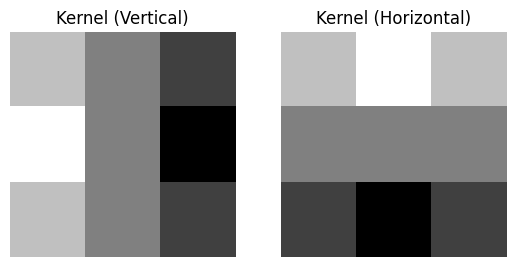

In [7]:
# Sobel Edge Detection

# edge_out_y3= cv2.Sobel(img,cv2.CV_8U,dx=1,dy=0,ksize=3)
# edge_out_x3= cv2.Sobel(img,cv2.CV_8U,dx=0,dy=1,ksize=3)

# X-Direction Kernel (Vertical)
sobel_kernel_x =  np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
# Y-Direction Kernel (Horizontal)
sobel_kernel_y =  np.array([[1,2,1], [0,0,0], [-1,-2,-1]])   

plt.subplot(1,2,1)
plt.imshow(sobel_kernel_x,cmap='gray') 
plt.title('Kernel (Vertical)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sobel_kernel_y,cmap='gray') 
plt.title('Kernel (Horizontal)')
plt.axis('off')

plt.show()

The following is the syntax for applying Sobel edge detection using OpenCV:

[cv2.Sobel(src, ddepth, dx, dy)](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)
    
- ddepth is the depth of the destination image 
- dx is Horizontal sobel derivative 
- dy is vertical sobel derivative
- ksize is the kernel size.

The parameter ddepth specifies the precision of the output image, while dx and dy specify the order of the derivative in each direction. For example:
- If dx=1 and dy=0, we compute the 1st derivative Sobel image in the x-direction.

If both dx=1 and dy=1, we compute the 1st derivative Sobel image in both directions

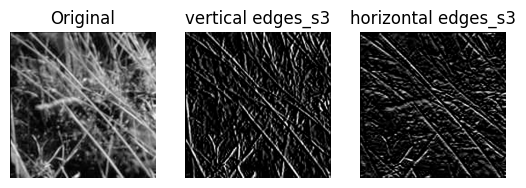

In [8]:
sobel_out_x = cv2.filter2D(img,-1,sobel_kernel_x)
sobel_out_y = cv2.filter2D(img,-1,sobel_kernel_y)

plt.subplot(1,3,1)
#the figure has 1 row, 3 columns, and this plot is the first plot.
plt.imshow(img,cmap='gray') 
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
#the figure has 1 row, 3 columns, and this plot is the second plot.
plt.imshow(sobel_out_x,cmap='gray') 
plt.title('vertical edges_s3')
plt.axis('off')
 
plt.subplot(1,3,3)
#the figure has 1 row, 2 columns, and this plot is the third plot.
plt.imshow(sobel_out_y,cmap='gray') 
plt.title('horizontal edges_s3')
plt.axis('off')

plt.show()

## (2) Cross-correlation vs. Convolution

*double click on the image to find the link (source) to it

![image](https://glassboxmedicine.files.wordpress.com/2019/07/convgif.gif?w=616)

(Image Source: This animation appears in many places, including [here](https://hackernoon.com/visualizing-parts-of-convolutional-neural-networks-using-keras-and-cats-5cc01b214e59))

<center><font color="#4d79ff" size="4"> Cross-correlation vs. Convolution </font></center>

![Image of cross-correlation](https://miro.medium.com/max/700/1*RhHoldDIzmca3ula71tkFg.png)

![Image of convolution](https://miro.medium.com/max/700/1*DJIJX1Adlo_DzKo63IBYSg.png)

(Image Source: These images appears in many places, including [here](https://towardsdatascience.com/convolution-vs-correlation-af868b6b4fb5))


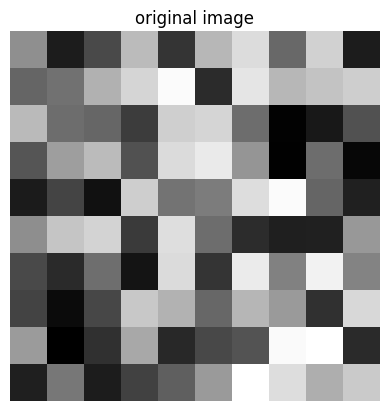

In [9]:
#cv2.filter2D accutually does correlation
#to compare convolution and correlation,we use scipy.signal, which contains both convolution and correlation

from scipy import signal

imgr= np.random.randint(255, size=(10,10),dtype=np.uint8) #random a small image

plt.imshow(imgr,cmap='gray') 
plt.title('original image')
plt.axis('off')
plt.show()  

[scipy.signal.correlate2d( )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html): Cross-correlate two 2-dimensional arrays.

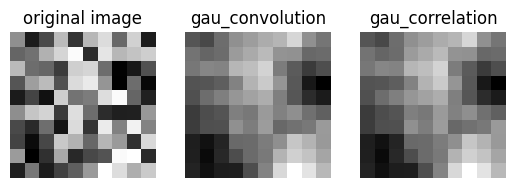

In [10]:
# gaussian filter

gau_kernel = cv2.getGaussianKernel(3,3)# 1d gaussian kernel (size, sigma)
gau_kern2d = np.outer(gau_kernel, gau_kernel )
gau_kern2d = gau_kern2d/gau_kern2d.sum()

#gau_out_corr = cv2.filter2D(imgr,-1,gau_kern2d,borderType=cv2.BORDER_REFLECT) #correlation
gau_out_corr = signal.correlate2d(imgr, gau_kern2d, boundary='symm', mode='same') #correlation

#gau_kern2d_conv=np.flip(gau_kern2d)
#gau_out_conv = cv2.filter2D(imgr,-1,gau_kern2d_conv)  
gau_out_conv = signal.convolve2d(imgr, gau_kern2d, boundary='symm', mode='same') #convolution

plt.subplot(1,3,1)
plt.imshow(imgr,cmap='gray') 
plt.title('original image')
plt.axis('off')
 
plt.subplot(1,3,2)
plt.imshow(gau_out_conv,cmap='gray') 
plt.title('gau_convolution')
plt.axis('off')
 
plt.subplot(1,3,3)
plt.imshow(gau_out_corr,cmap='gray') 
plt.title('gau_correlation')
plt.axis('off') 

plt.show() # the kernel is symmetric, so the outputs are the same

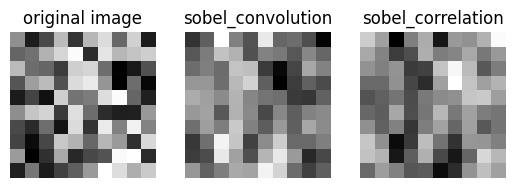

In [11]:
sobel_kernel =  np.array([[1,0,-1], [2,0,-2], [1,0,-1]])   
#sobel_out_corr = cv2.filter2D(imgr,-1,sobel_kernel,borderType=cv2.BORDER_REFLECT)
sobel_out_corr = signal.correlate2d(imgr, sobel_kernel, boundary='symm', mode='same') #correlation

#sobel_kernel_conv = np.flip(sobel_kernel)
#sobel_out_conv = cv2.filter2D(imgr,-1,sobel_kernel_conv)
sobel_out_conv = signal.convolve2d(imgr, sobel_kernel, boundary='symm', mode='same') #convolution

plt.subplot(1,3,1)
plt.imshow(imgr,cmap='gray') 
plt.title('original image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sobel_out_conv,cmap='gray') 
plt.title('sobel_convolution')
plt.axis('off')
 
plt.subplot(1,3,3)
plt.imshow(sobel_out_corr,cmap='gray') 
plt.title('sobel_correlation')
plt.axis('off') 

plt.show() # the kernel is asymmetric, so the outputs are different

## (3) Derivative of Gaussian

[np.gradient( )](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html): Return the gradient of an N-dimensional array.

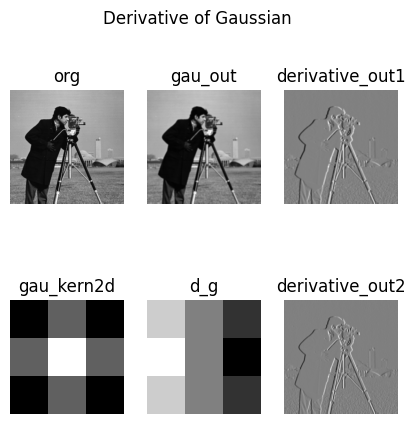

In [12]:
#we use scipy.signal, which contains correlation
from scipy import signal

rootpath='./'
img2= cv2.imread(os.path.join(rootpath, "img2.png"),cv2.IMREAD_GRAYSCALE) 

gau_kernel = cv2.getGaussianKernel(3,1) # 1d gaussian kernel (size, sigma)
gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d=gau_kern2d/np.abs(gau_kern2d).sum()


gau_out=signal.convolve2d(img2,gau_kern2d, boundary='symm', mode='same')

#Return the gradient of an N-dimensional array.
derivative_out1=np.gradient(gau_out,axis=1)

#plt.subplot(): You can draw as many plots you like on one figure, 
#just descibe the number of rows, columns, and the index of the plot. 
#For example, Draw 6 plots in a figure with 2 row, 3 columns.
#stacking in two directions （row, columns,the index of the plot）


#Figure size in inches (default)
plt.subplots(figsize=(5, 5)) 

plt.subplot(2,3,1)
plt.imshow(img2,cmap='gray') 
plt.title('org')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(gau_out,cmap='gray') 
plt.title('gau_out')
plt.axis('off')
 
plt.subplot(2,3,3)
plt.imshow(derivative_out1,cmap='gray') 
plt.title('derivative_out1')
plt.axis('off') 

#The derivative of a Gaussian Process is also a Gaussian Process
d_g=np.gradient(gau_kern2d,axis=1) 
derivative_out2=signal.convolve2d(img2,d_g, boundary='symm', mode='same')

plt.subplot(2,3,4)
plt.imshow(gau_kern2d,cmap='gray') 
plt.title('gau_kern2d')
plt.axis('off')


plt.subplot(2,3,5)
plt.imshow(d_g,cmap='gray') 
plt.title('d_g')
plt.axis('off')


plt.subplot(2,3,6)
plt.imshow(derivative_out2,cmap='gray') 
plt.title('derivative_out2')
plt.axis('off') 

plt.suptitle("Derivative of Gaussian")
plt.show() 

## (4) Handle border effect

[borderType](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5): pixel extrapolation method

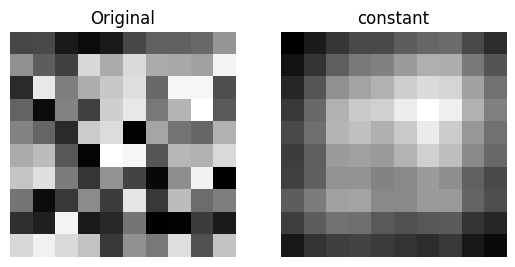

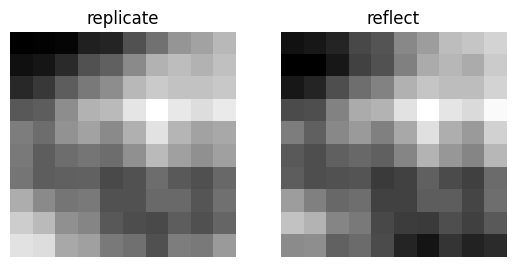

In [13]:
img= np.random.randint(255, size=(10,10),dtype=np.uint8) #random  a small image


gau_kernel = cv2.getGaussianKernel(5,5)# 1d gaussian kernel (size, sigma)
gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d = gau_kern2d/gau_kern2d.sum()

#Various border types, image boundaries are denoted with |
gau_out1 = cv2.filter2D(img,-1,gau_kern2d, borderType = cv2.BORDER_CONSTANT ) #iiiiii|abcdefgh|iiiiiii
gau_out2 = cv2.filter2D(img,-1,gau_kern2d, borderType =cv2.BORDER_REPLICATE) #aaaaaa|abcdefgh|hhhhhhh
gau_out3 = cv2.filter2D(img,-1,gau_kern2d, borderType =cv2.BORDER_REFLECT) #fedcba|abcdefgh|hgfedcb

plt.subplot(1,2,1)   
plt.imshow(img ,cmap='gray')  
plt.title('Original')
plt.axis('off')
                
plt.subplot(1,2,2)
plt.imshow(gau_out1,cmap='gray')  
plt.title('constant')
plt.axis('off')

plt.show()

plt.subplot(1,2,1)
plt.imshow(gau_out2,cmap='gray') 
plt.title('replicate')
plt.axis('off')

 
plt.subplot(1,2,2)
plt.imshow(gau_out3,cmap='gray') 
plt.title('reflect')
plt.axis('off')
plt.show()

### Q: What happens if you increase the size ("support") of a spatial filter? 
For example, a standard Sobel kernel is usually implemented as a 3x3 matrix, but we can make it arbitrary size by padding with N zeros on each side (e.g., N=50 to make a 103x103 filter). What happens as N increases?

Let's increase N for a standard filter and see the effects!

In [14]:
from scipy import signal, misc

# Measure execution time
import time

In [15]:
def sobel_filter(image, padding=0):
    # Define 3x3 Sobel filters
    # X-Direction Kernel (Vertical)
    sobel_x =  np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
    
    # Add padding
    sobel_x = np.pad(sobel_x, ((padding, padding), (padding, padding)), mode='constant')

    # Apply filter and return "valid" convolution results
    start = time.time()
    img_sobel = signal.convolve2d(image, sobel_x, mode='valid')
    end = time.time()
    
    return img_sobel, end - start

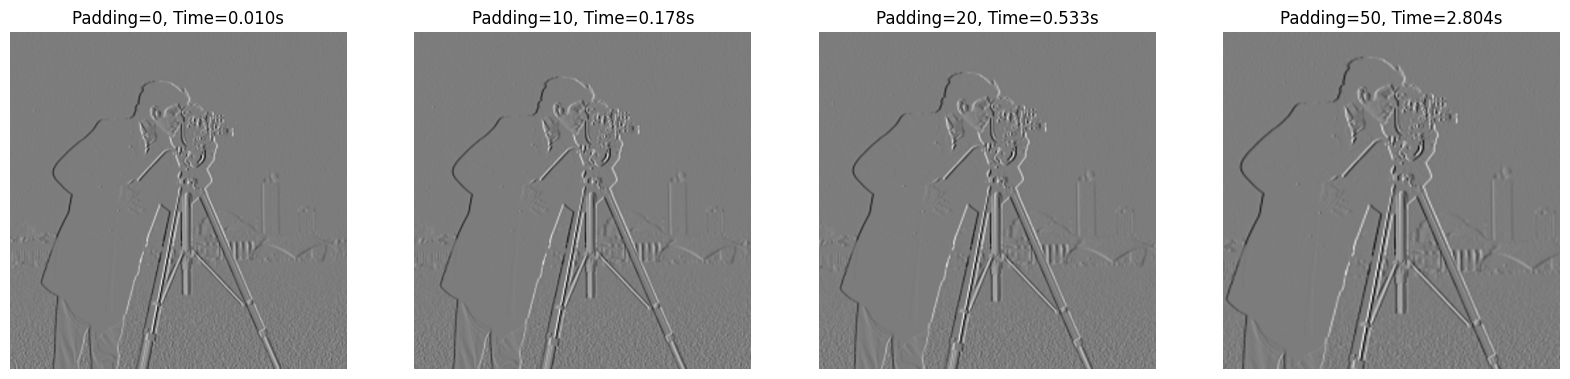

In [16]:
# Load an demo image
demo_img = cv2.imread(os.path.join(rootpath, "F1.5.png"),cv2.IMREAD_GRAYSCALE) 

# Apply filter with different paddings
padding_values = [0, 10, 20, 50]
results = []
for padding in padding_values:
    result, time_taken = sobel_filter(demo_img, padding)
    results.append((result, time_taken))

# Plot the results
fig, ax = plt.subplots(1, len(padding_values), figsize=(20, 5))
for i, (result, time_taken) in enumerate(results):
    ax[i].imshow(result, cmap=plt.cm.gray)
    ax[i].set_title(f"Padding={padding_values[i]}, Time={time_taken:.3f}s")
    ax[i].axis('off')
plt.show()

As you can see, increasing the support of a filter does not change its effect, but the speed decreases, and the "valid" convolutional output gets smaller (the "same" size output does not change).

# Frequency Filtering

## (1) Fourier transformation

<center><font color="#4d79ff" size="4">  Fourier series and transform <center></font> 

![Image of Fourier series and transform](https://upload.wikimedia.org/wikipedia/commons/2/2b/Fourier_series_and_transform.gif)

(Image courtesy: [Wikipedia](https://en.wikipedia.org/wiki/Fourier_series))

In [17]:
rootpath='./'

We took an image, we decompose it into magnitude and phase

In [18]:
def FFT_image(img):
    # Fast Fourier transform
    f = np.fft.fft2(img)
    
    # Shift the low frequency component to the center
    f = np.fft.fftshift(f)

    # Fourier phase and magnitude
    phase = np.angle(f)
    magnitude = np.abs(f)
    
    #Figure size in inches (default)
    plt.subplots(figsize=(10, 10)) 
    
    # Original image
    plt.subplot(1,3,1)
    plt.imshow(img ,cmap='gray')  
    plt.title('Image')
    plt.axis('off')

    # Phase
    plt.subplot(1,3,2)
    plt.imshow(phase ,cmap='gray')  
    plt.title('Phase')
    plt.axis('off')
    
    # Magnitude
    plt.subplot(1,3,3)
    plt.imshow(magnitude ,cmap='gray')  
    plt.title('Magnitude')
    plt.axis('off')

    plt.show()

Low frequencies in images: pixel values that are changing slowly.

High frequencies in images mean pixel values that are changing dramatically. 

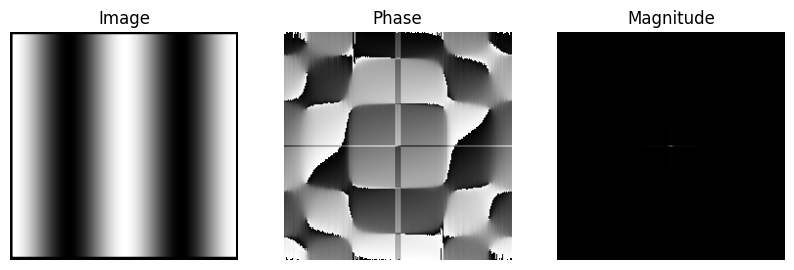

In [19]:
img= cv2.imread(os.path.join(rootpath, "F1.1.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image(img)

Here we've got a signal that's quite low frequency. It's only in the horizontal. So we've got a Fourier transform that's got just two little peaks representing the frequency of that sinusoid and there across the X, because it's only in the horizontal.

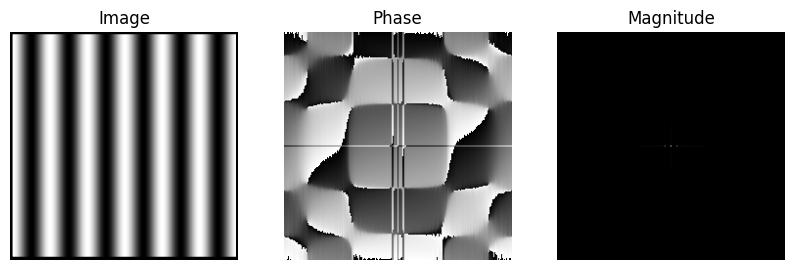

In [20]:
img = cv2.imread(os.path.join(rootpath, "F1.2.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image(img)

Here we have a higher frequency sinusoid. So we have slightly more spaced out dots. It's a higher frequency represented.

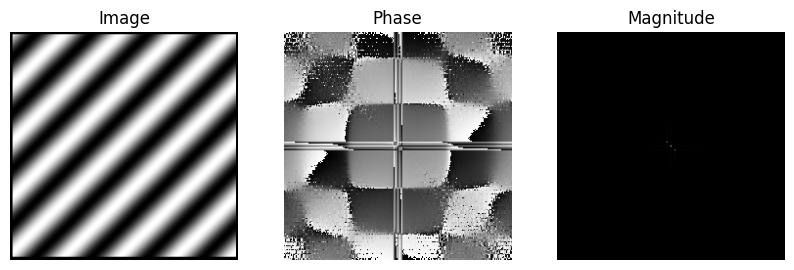

In [21]:
img = cv2.imread(os.path.join(rootpath, "F1.3.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image(img)

This is a diagonal sinusoid. So we've got the same dots, essentially the same frequency, but along the diagonal direction.

In [22]:
def FFT_image_log(img):
    # Fourier transform
    f = np.fft.fft2(img)
    # Shift the low frequency component to the center
    f = np.fft.fftshift(f)
    
    # Fourier phase and magnitude
    phase = np.angle(f)
    magnitude = np.abs(f)
    # the orginal magnitute is too small, we show log of the value to make it clear
    magnitude_log = np.log(np.abs(f))  
    
    #figure size
    plt.subplots(figsize=(7, 7)) 

    # Original image
    plt.subplot(2,2,1)
    plt.imshow(img ,cmap='gray')  
    plt.title('image')
    plt.axis('off')

    # Phase
    plt.subplot(2,2,2)
    plt.imshow(phase ,cmap='gray')  
    plt.title('phase')
    plt.axis('off')
    
    # the orginal magnitude
    plt.subplot(2,2,3)
    plt.imshow(magnitude ,cmap='gray')  
    plt.title('magnitude')
    plt.axis('off')

    # log of the orginal magnitude
    plt.subplot(2,2,4)
    plt.imshow(magnitude_log ,cmap='gray')  
    plt.title('log magnitude')
    plt.axis('off')

    plt.show()

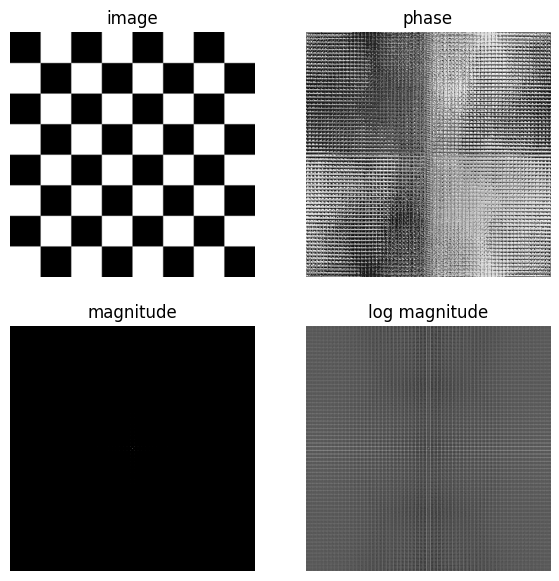

In [23]:
img= cv2.imread(os.path.join(rootpath, "F1.4.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

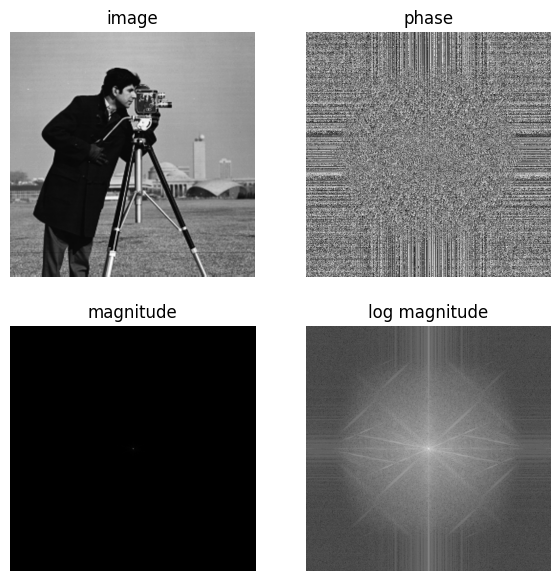

In [24]:
img = cv2.imread(os.path.join(rootpath, "F1.5.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

The line/stripe in magnitude corresponds to anything that's orthogonal to that in the image.

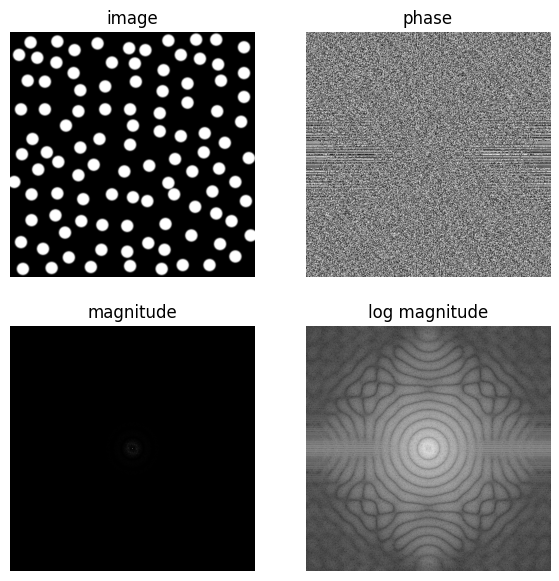

In [25]:
img = cv2.imread(os.path.join(rootpath, "F1.6.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

We've got little dots, so there's no vertical lines. There's no horizontal lines. It's just circles everywhere.

And so you see this strong circular pattern. The period of the pattern is probably reflecting. Something about the the spacing of the dots are the size of the dots as well.

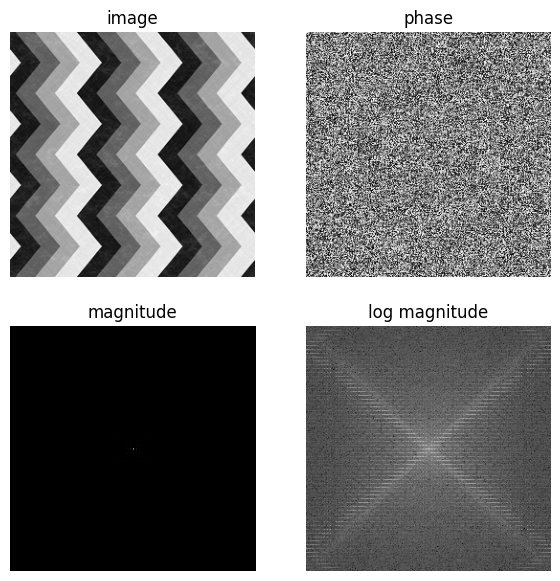

In [26]:
img = cv2.imread(os.path.join(rootpath, "F1.7.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

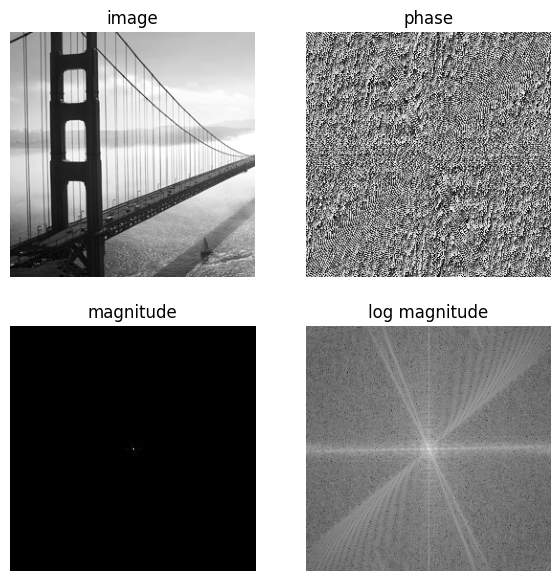

In [27]:
img = cv2.imread(os.path.join(rootpath, "F1.8.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

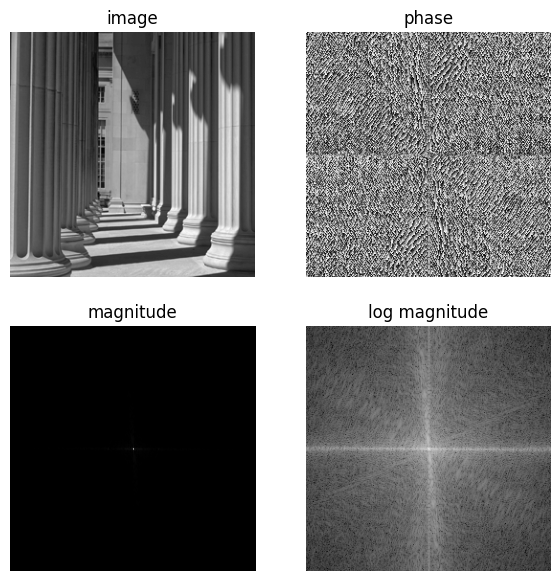

In [28]:
img = cv2.imread(os.path.join(rootpath, "F1.9.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

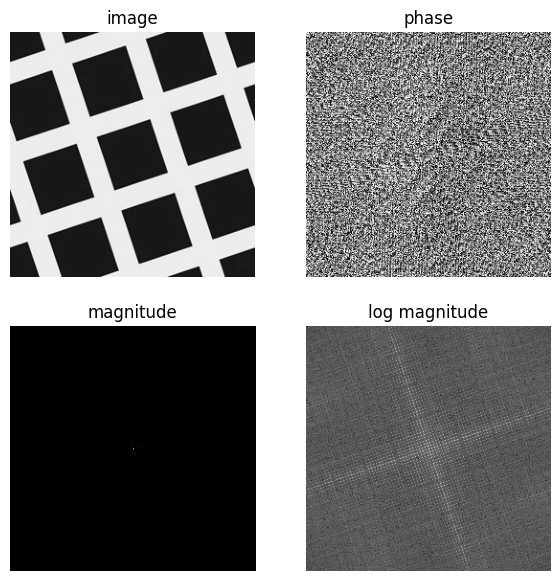

In [29]:
img = cv2.imread(os.path.join(rootpath, "F1.10.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

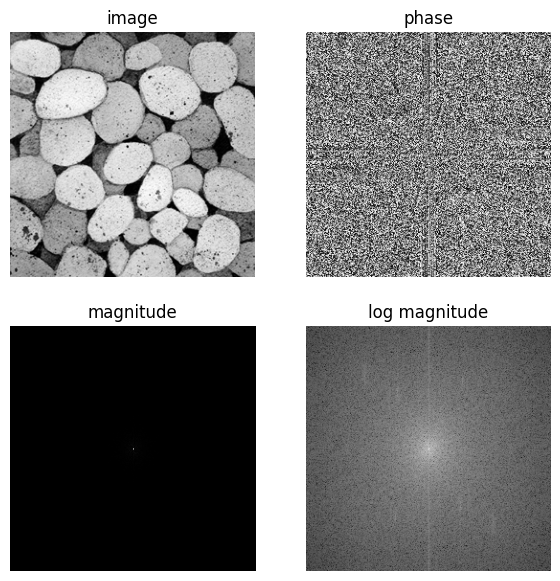

In [30]:
img = cv2.imread(os.path.join(rootpath, "F1.11.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

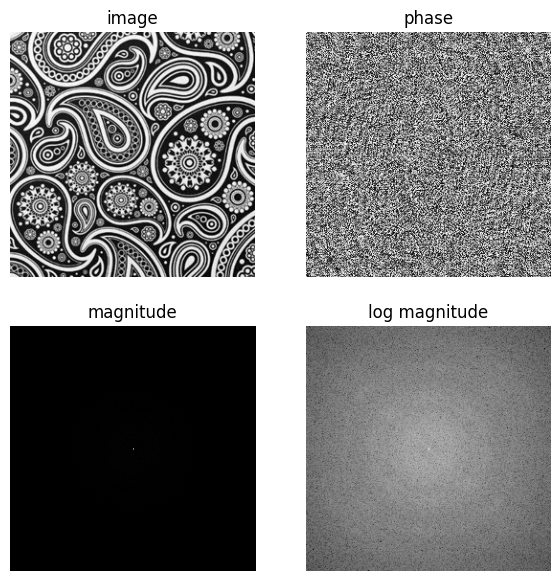

In [31]:
img = cv2.imread(os.path.join(rootpath, "F1.12.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

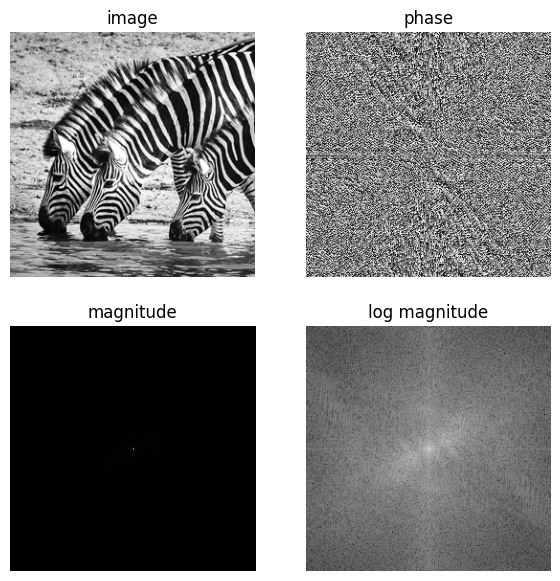

In [32]:
img = cv2.imread(os.path.join(rootpath, "F1.13.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

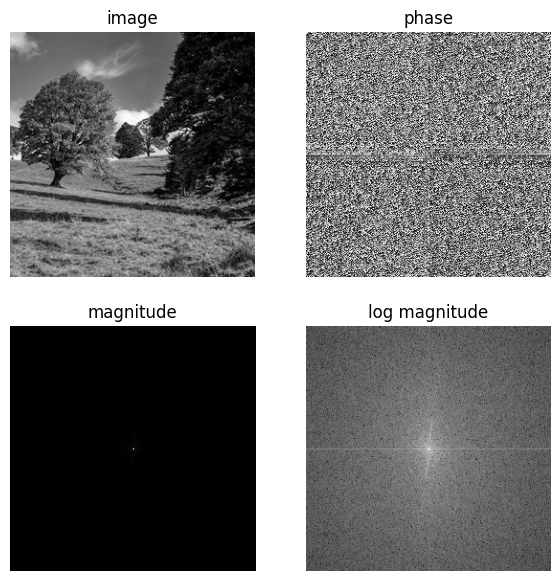

In [33]:
img = cv2.imread(os.path.join(rootpath, "F1.14.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

libpng warning: iCCP: known incorrect sRGB profile


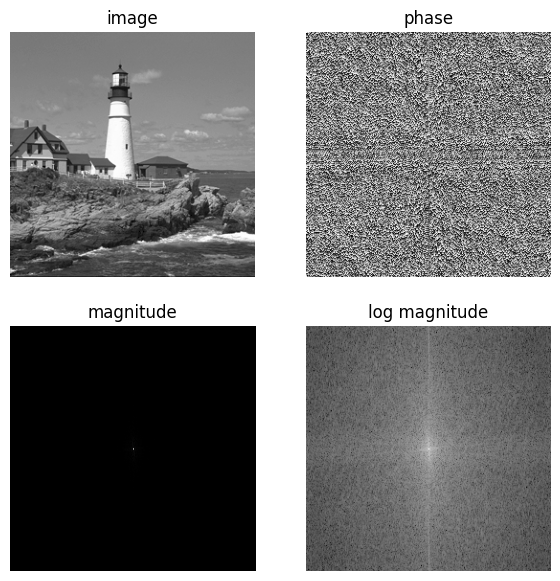

In [34]:
img = cv2.imread(os.path.join(rootpath, "F1.15.png"),cv2.IMREAD_GRAYSCALE) 
FFT_image_log(img)

## (2) Swap magnitude/phase 

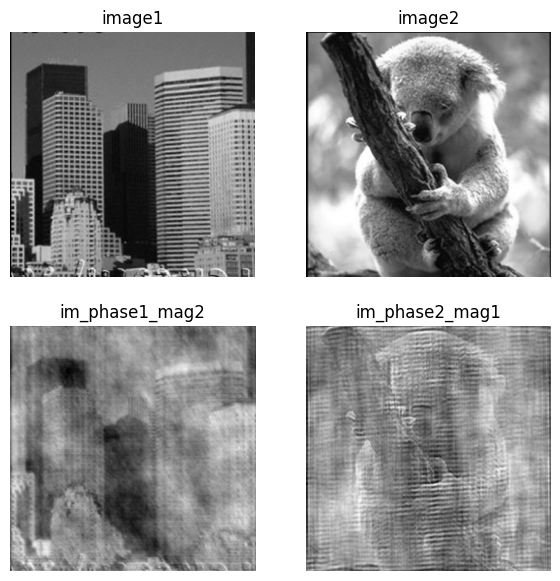

In [35]:
img1= cv2.imread(os.path.join(rootpath, "f2.1.png"),cv2.IMREAD_GRAYSCALE) 
img1= cv2.resize(img1,(350,350))

# Fourier transform
f = np.fft.fft2(img1)
# Shift the low frequency component to the center
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase1 = np.angle(f)
magnitude1 = np.abs(f)

img2= cv2.imread(os.path.join(rootpath, "f2.2.png"),cv2.IMREAD_GRAYSCALE) 
img2= cv2.resize(img2,(350,350))

# Fourier transform
f = np.fft.fft2(img2)
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase2 = np.angle(f)
magnitude2 = np.abs(f)

phase1_mag2 = np.multiply(magnitude2, np.exp(1j*phase1))
phase2_mag1 = np.multiply(magnitude1, np.exp(1j*phase2))

# Invert Fourier transform to get images

# im_phase1_mag2 = np.real(np.fft.ifft2(np.fft.fftshift(phase1_mag2)))
# im_phase2_mag1 = np.real(np.fft.ifft2(np.fft.fftshift(phase2_mag1 )))

# fftshift -> ifftshift

# (Invert of FFT(Shift the low-frequency component back to original location))
im_phase1_mag2 = np.real(np.fft.ifft2(np.fft.ifftshift(phase1_mag2)))
im_phase2_mag1 = np.real(np.fft.ifft2(np.fft.ifftshift(phase2_mag1 )))


#Figure size
plt.subplots(figsize=(7, 7)) 

plt.subplot(2,2,1)
plt.imshow(img1 ,cmap='gray')  
plt.title('image1')
plt.axis('off')
 
plt.subplot(2,2,2)
plt.imshow(img2 ,cmap='gray')  
plt.title('image2')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(im_phase1_mag2, cmap='gray')  
plt.title('im_phase1_mag2')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(im_phase2_mag1 ,cmap='gray')  
plt.title('im_phase2_mag1')
plt.axis('off')

plt.show()

#What aspects of the image are captured by the magnitude and the phase of the FT? 

## (3) Fourier transform a filter 

Convolution in spatial domain = multiplication in Fourier domain

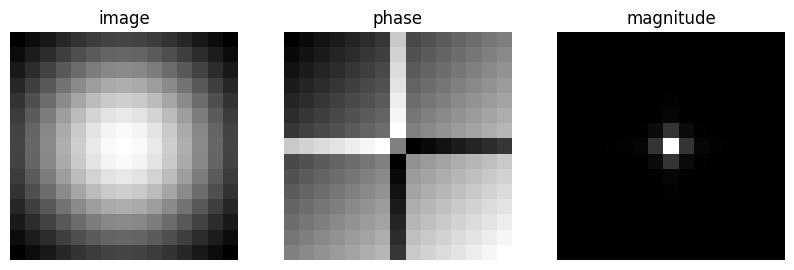

In [36]:
# Gaussian filter size 15
 
gau_kernel = cv2.getGaussianKernel(15,5)# 1d gaussian kernel (size, sigma)
gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d=gau_kern2d/gau_kern2d.sum()
  
# Fourier transform
f = np.fft.fft2(gau_kern2d)
# Shift the low frequency component to the center
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase = np.angle(f)
magnitude = np.abs(f)

plt.subplots(figsize=(10, 10)) 

plt.subplot(1,3,1)
plt.imshow(gau_kern2d ,cmap='gray')  
plt.title('image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(phase ,cmap='gray')  
plt.title('phase')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(magnitude ,cmap='gray')  
plt.title('magnitude')
plt.axis('off')

plt.show()

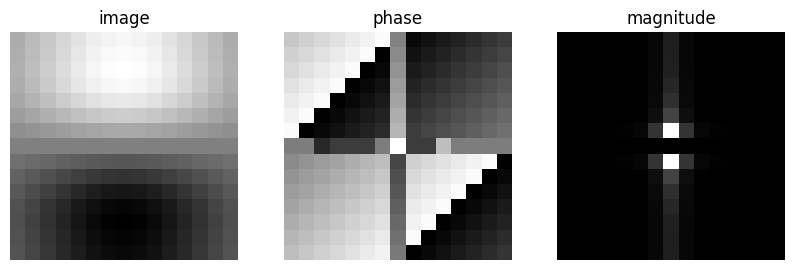

In [37]:
gau_kern2d=np.gradient(gau_kern2d,axis=0)

# Fourier transform
f = np.fft.fft2(gau_kern2d)
# Shift the low frequency component to the center
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase = np.angle(f)
magnitude = np.abs(f)

             
plt.subplots(figsize=(10, 10)) 

plt.subplot(1,3,1)
plt.imshow(gau_kern2d ,cmap='gray')  
plt.title('image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(phase ,cmap='gray')  
plt.title('phase')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(magnitude ,cmap='gray')  
plt.title('magnitude')
plt.axis('off')

plt.show()

## Bandpass filter

Bandpass filter = a filter that removes a range of frequencies from a signal

Low pass filter = keep low spatial frequencies, remove high frequencies

High pass filter = keep high spatial frequencies, remove low frequencies


## (4) Gaussian lowpass filter in the frequency domain

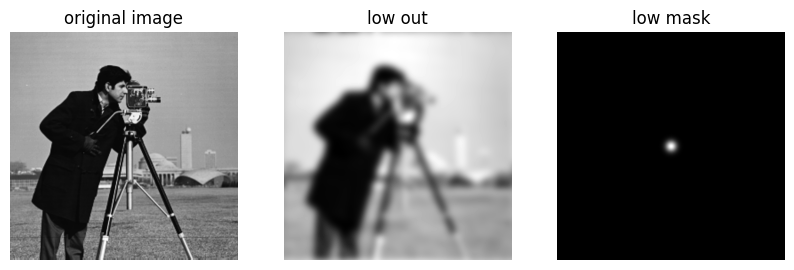

In [38]:
radius_low = 10

rootpath='./'
img= cv2.imread(os.path.join(rootpath, "F1.5.png"),cv2.IMREAD_GRAYSCALE) 

 
# Fourier transform
f = np.fft.fft2(img)
# Shift the low frequency component to the center
f = np.fft.fftshift(f)


def Gauss_LowPass(f,radius_low):  
#values are higher near the center, and close to zero outside        
    
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
  
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = np.exp((-1)*dis**2/2/(radius_low**2))
        
    
    result = np.multiply(f, mask) 
    return result,mask

 

f_low_filtered,mask_low = Gauss_LowPass(f,radius_low)
  

# Invert Fourier transform to get the filtered image
# (Invert of FFT(Shift the low-frequency component back to original location))

# fftshift -> ifftshift
img_low = np.real(np.fft.ifft2(np.fft.ifftshift(f_low_filtered)))


plt.subplots(figsize=(10, 10)) 

plt.subplot(1,3,1)
plt.imshow(img ,cmap='gray')  
plt.title('original image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_low ,cmap='gray')  
plt.title('low out')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(mask_low ,cmap='gray')  
plt.title('low mask')
plt.axis('off')

plt.show()

#  Exercise

(1) Implement a 2D Gaussian blur using two 1D filters. Compare the running time with the 2D Gaussian filtering

(2) Try varying the kernel size of Gaussian filter and see what changes. e.g., blur with a 5x5 Gaussian vs. a 15x15 Gaussian. 

(3) Take an image and "delete" its magnitude or phase by replacing it with random values. 

(4) Implement a Gaussian highpass filter in the frequency domain.

(5) Consider the 7 x 7 image pixel image shown below:

| &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   |
|----------|----------|----------|----------|----------|----------|----------|
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |
|     0    |     0    |     1    |     1    |     1    |     0    |     0    |
|     0    |     0    |     1    |     1    |     1    |     0    |     0    |
|     0    |     0    |     1    |     1    |     1    |     0    |     0    |
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |

Propose a filter that, when convolved with the image above, will give a maximum response in the central pixel of the output and a lower response everywhere else. Note that there are many filter kernels that can achieve this result; for full credit you must propose a kernel that is as small (in x,y dimensions) as possible. Briefly justify your choice of kernel.